# Projeto de Classificação de Gênero com SVM

- Base de dados encontrada em: 

https://www.kaggle.com/primaryobjects/voicegender.

- Diferentes kernels para o SVM, baseado no trabalho de:

https://github.com/Abdallah-Abdelazim/Gender-Recognition-by-Voice/blob/master/logistic_knn_svm.py

- Primeira referência prática sobre o uso de SVM para a classificação de gênero:

https://github.com/primaryobjects/voice-gender

- Referência base para a utilização de SVM com kernel gaussiano:

Livro "TensorFlow Machine Learning Cookbook", de Nick McClure.

- Como a partir do .csv os dados foram utilizados no tensor flow:

https://towardsdatascience.com/how-to-use-dataset-in-tensorflow-c758ef9e4428

Importando bibliotecas:

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

Importando base de dados com as features de voz, de mostrando a base de dados:

In [6]:
dados = pd.read_csv("voice.csv")

In [7]:
dados.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

In [8]:
dados.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

Verificando valores únicos de classificação:

In [9]:
dados.label.unique()

array(['male', 'female'], dtype=object)

Quantidade de amostras na base de dados:

In [10]:
len(dados)

3168

Criando um vetor com a classificação da voz, entre masculina e feminina, para separar um vetor de features e outro de labels.

In [11]:
encoding = []

for i in range(len(dadis)):
    if dadis.label[i] == 'male':
        encoding.append(0);
    else:
        encoding.append(1);

encoding = pd.DataFrame(encoding)

encoding.head()


0
0  0
1  0
2  0
3  0
4  0

Retirando anotação dos dados:

In [12]:
dados = dados.drop('label', axis=1)

Dividindo a base entre treino e teste:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dados, encoding, test_size=0.2, random_state=0)  

Iniciando o tratamento para treino do modelo, a partir do modelo SVM do scikit learn. 

Neste teste, verificamos a utilização de todas as features para a predição do gênero de quem fala. Para isso, são usados diferentes tipos de kernels: linear, RBF, sigmoidal e polinomial.

In [14]:
stdSc = StandardScaler()  # preprocessing
X_train = stdSc.fit_transform(X_train)
X_test = stdSc.fit_transform(X_test)

Treinando os modelos e exibindo a sua acurácia:

In [15]:
C = [5, 15, 0.01, 0.1, 1, 10, 100, 1000]
kernels = ['rbf', 'linear', 'sigmoid', 'poly']
for i in enumerate(C):
    for k in kernels:
        clf1 = svm.SVC(C=i[1], kernel=k)
        clf1.fit(X_train, y_train)
        print("SVM Accuracy (C={} & kernel={}):".format(i[1], k))
        print(accuracy_score(clf1.predict(X_test), y_test))
    print("-----------------------------------------------------------")

SVM Accuracy (C=5 & kernel=rbf):
0.9810725552050473
SVM Accuracy (C=5 & kernel=linear):
0.9747634069400631
SVM Accuracy (C=5 & kernel=sigmoid):
0.7760252365930599
SVM Accuracy (C=5 & kernel=poly):
0.973186119873817
-----------------------------------------------------------
SVM Accuracy (C=15 & kernel=rbf):
0.9842271293375394
SVM Accuracy (C=15 & kernel=linear):
0.9747634069400631
SVM Accuracy (C=15 & kernel=sigmoid):
0.7744479495268138
SVM Accuracy (C=15 & kernel=poly):
0.9747634069400631
-----------------------------------------------------------
SVM Accuracy (C=0.01 & kernel=rbf):
0.9100946372239748
SVM Accuracy (C=0.01 & kernel=linear):
0.9668769716088328
SVM Accuracy (C=0.01 & kernel=sigmoid):
0.9116719242902208
SVM Accuracy (C=0.01 & kernel=poly):
0.9227129337539433
-----------------------------------------------------------
SVM Accuracy (C=0.1 & kernel=rbf):
0.9684542586750788
SVM Accuracy (C=0.1 & kernel=linear):
0.9716088328075709
SVM Accuracy (C=0.1 & kernel=sigmoid):
0.86119

# Classificador de gênero utilizando o TensorFlow

Como primeiro passo, plotamos as variáveis duas a duas para encontrar aquelas que possuem a melhor separação espacial dos dados separados entre voz feminina e masculina.

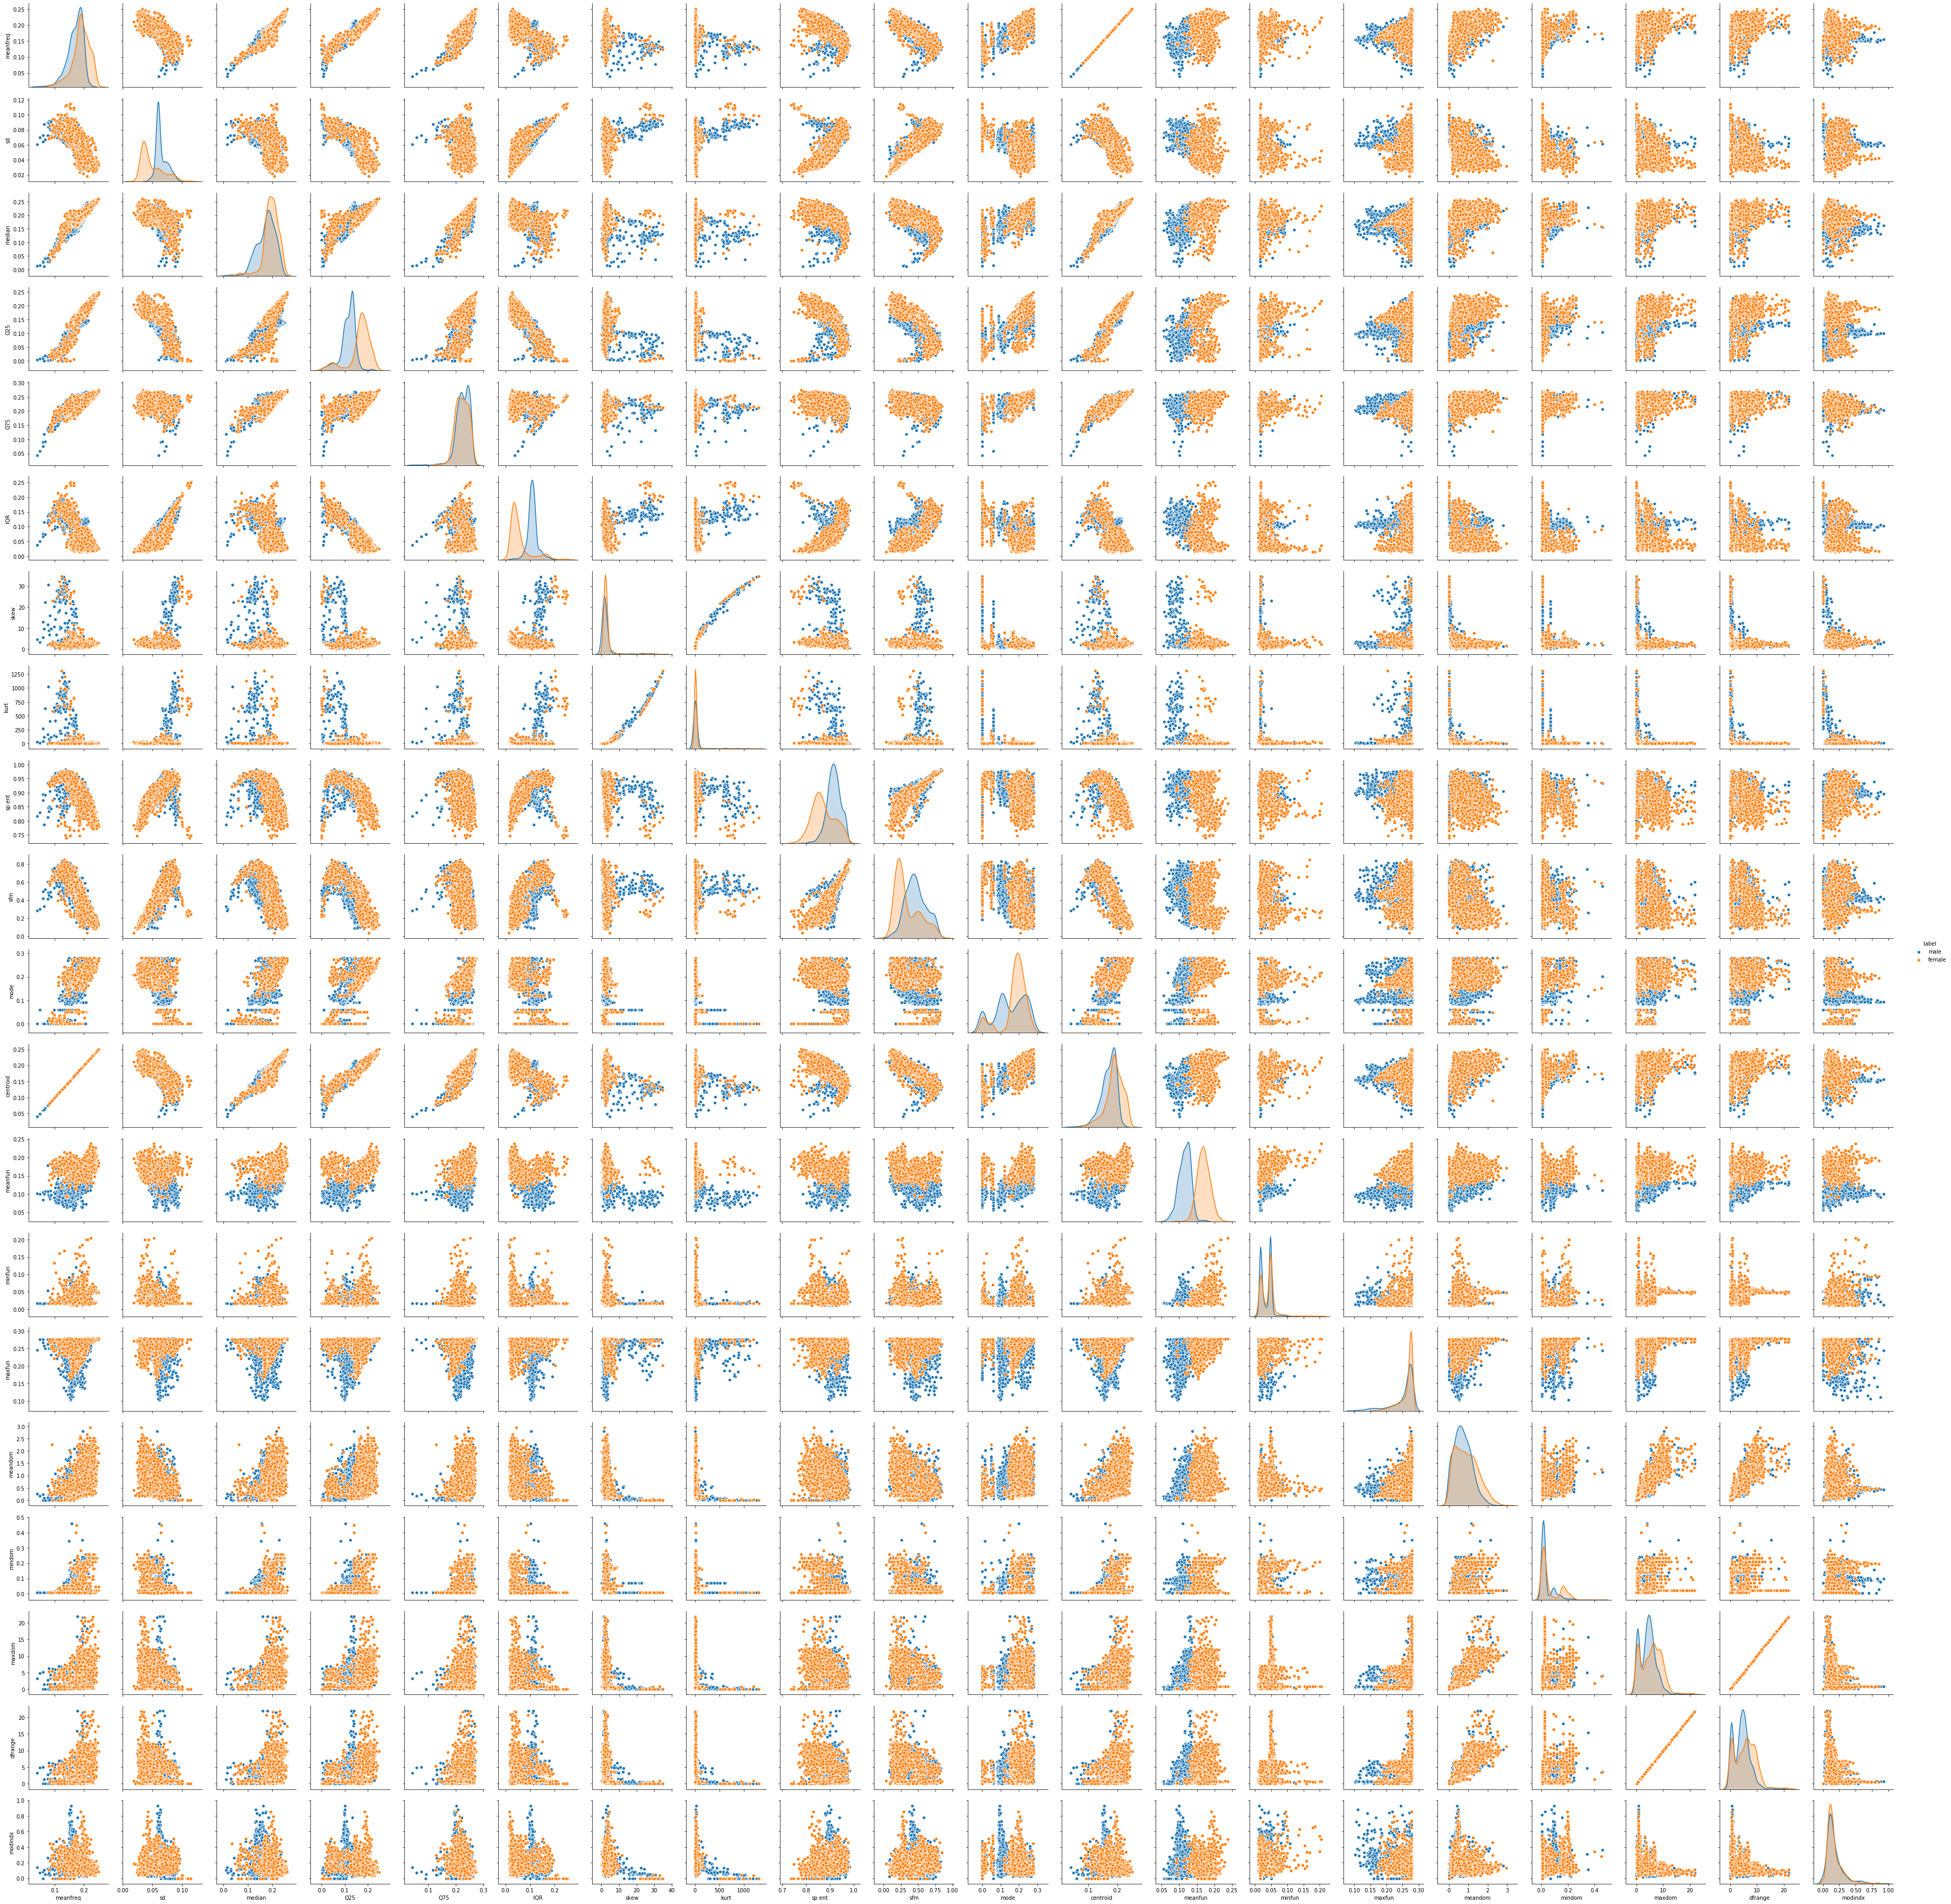

In [12]:
# left
sns.pairplot(dados, hue="label")
plt.show()

In [16]:
dados.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

### Selecionando algumas das features que melhor separam o plano

As melhores combinações encontradas foram:

- maxfun x meanfun
- minfun x meanfun
- mode x meanfun
- skew x meanfun
- kurt x meanfun

In [ ]:
dadis = pd.read_csv('voice.csv')[['Q25', 'IQR', 'meanfun', 'maxfun', 'minfun', 'mode', 'skew', 'kurt', 'label']]

In [19]:
dadis.tail()

Q25       IQR   meanfun    maxfun    minfun      mode      skew  \
3163  0.049285  0.151859  0.182790  0.262295  0.083770  0.200836  1.762129   
3164  0.042718  0.162193  0.188980  0.275862  0.034409  0.013683  0.693730   
3165  0.033424  0.190936  0.209918  0.275862  0.039506  0.008006  1.876502   
3166  0.043508  0.176435  0.172375  0.250000  0.034483  0.212202  1.591065   
3167  0.070072  0.180756  0.185607  0.271186  0.062257  0.267702  1.705029   

          kurt   label  
3163  6.630383  female  
3164  2.503954  female  
3165  6.604509  female  
3166  5.388298  female  
3167  5.769115  female

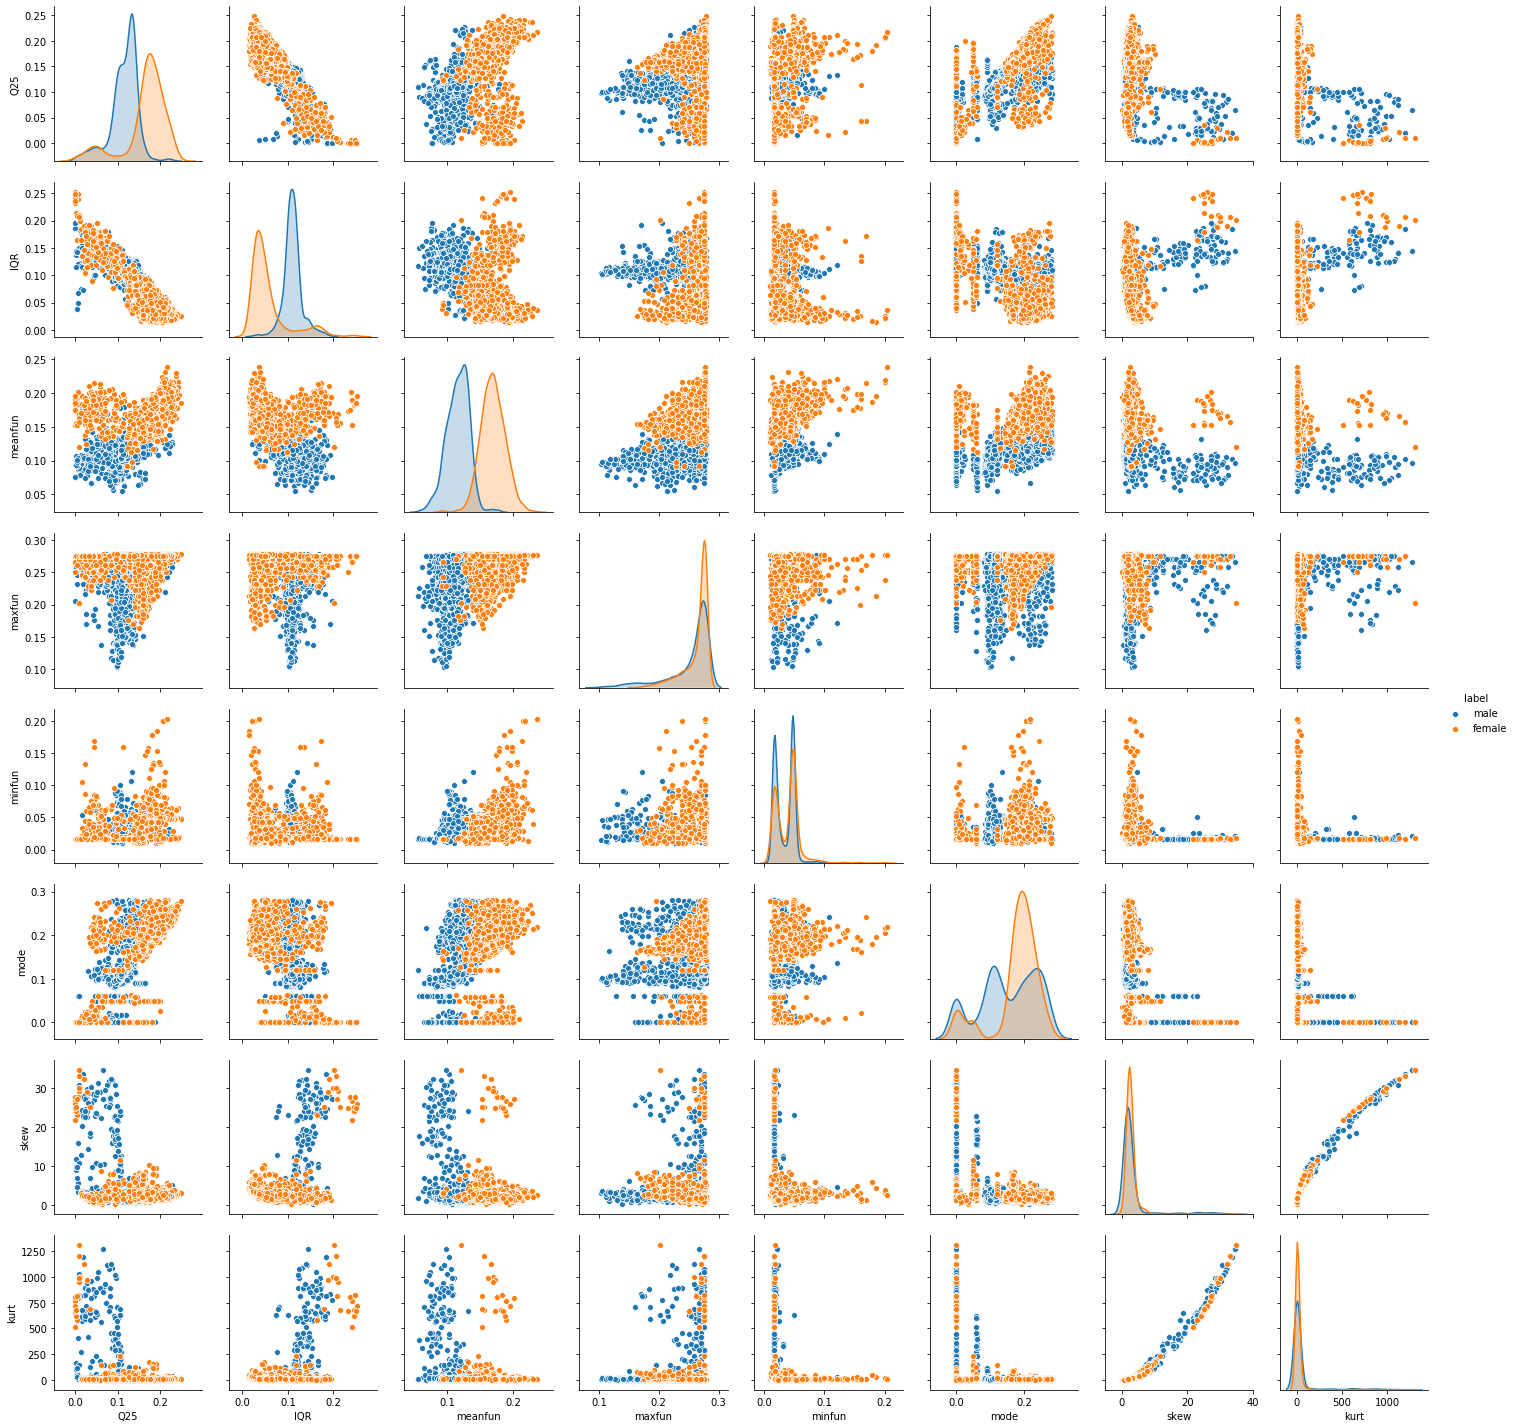

In [20]:
sns.pairplot(dadis, hue="label")
plt.show()

In [22]:
encod = []

for i in range(len(dados)):
    if dadis.label[i] == 'male':
        encod.append(0);
    else:
        encod.append(1);

encod = pd.DataFrame(encod)

encod.head()


0
0  0
1  0
2  0
3  0
4  0

In [23]:
encod

0
0     0
1     0
2     0
3     0
4     0
...  ..
3163  1
3164  1
3165  1
3166  1
3167  1

[3168 rows x 1 columns]

In [24]:
dadis = dadis.drop('label', axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dadis, encod, test_size=0.2, random_state=0)  

In [26]:
stdSc = StandardScaler()  # preprocessing
X_train = stdSc.fit_transform(X_train)
X_test = stdSc.fit_transform(X_test)

Realizando o treino com poucas variáveis e com o scikit learn, e verificando diferenças na acurácia com menos features (agora) e mais features (resultados anteriores).

In [ ]:
C = [5, 15, 0.01, 0.1, 1, 10, 100, 1000]
kernels = ['rbf', 'linear', 'sigmoid', 'poly']
for i in enumerate(C):
    for k in kernels:
        clf1 = svm.SVC(C=i[1], kernel=k)
        clf1.fit(X_train, y_train)
        print("SVM Accuracy (C={} & kernel={}):".format(i[1], k))
        print(accuracy_score(clf1.predict(X_test), y_test))
    print("-----------------------------------------------------------")

### Preparando dados para utilização do Tensorflow

In [28]:
dadis.to_numpy()

array([[1.50714886e-02, 7.51219512e-02, 8.42791064e-02, ...,
        0.00000000e+00, 1.28634618e+01, 2.74402906e+02],
       [1.94138670e-02, 7.32523231e-02, 1.07936554e-01, ...,
        0.00000000e+00, 2.24232854e+01, 6.34613855e+02],
       [8.70105656e-03, 1.23206961e-01, 9.87062616e-02, ...,
        0.00000000e+00, 3.07571546e+01, 1.02492770e+03],
       ...,
       [3.34238742e-02, 1.90936383e-01, 2.09917677e-01, ...,
        8.00571837e-03, 1.87650163e+00, 6.60450859e+00],
       [4.35081030e-02, 1.76434700e-01, 1.72374996e-01, ...,
        2.12202097e-01, 1.59106489e+00, 5.38829754e+00],
       [7.00715015e-02, 1.80755873e-01, 1.85606931e-01, ...,
        2.67701736e-01, 1.70502912e+00, 5.76911537e+00]])

In [49]:
features = dadis.to_numpy()
features

array([[1.50714886e-02, 7.51219512e-02, 8.42791064e-02, ...,
        0.00000000e+00, 1.28634618e+01, 2.74402906e+02],
       [1.94138670e-02, 7.32523231e-02, 1.07936554e-01, ...,
        0.00000000e+00, 2.24232854e+01, 6.34613855e+02],
       [8.70105656e-03, 1.23206961e-01, 9.87062616e-02, ...,
        0.00000000e+00, 3.07571546e+01, 1.02492770e+03],
       ...,
       [3.34238742e-02, 1.90936383e-01, 2.09917677e-01, ...,
        8.00571837e-03, 1.87650163e+00, 6.60450859e+00],
       [4.35081030e-02, 1.76434700e-01, 1.72374996e-01, ...,
        2.12202097e-01, 1.59106489e+00, 5.38829754e+00],
       [7.00715015e-02, 1.80755873e-01, 1.85606931e-01, ...,
        2.67701736e-01, 1.70502912e+00, 5.76911537e+00]])

https://towardsdatascience.com/how-to-use-dataset-in-tensorflow-c758ef9e4428

In [50]:
labels = encod.to_numpy()
labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [54]:
sess = tf.Session()

In [73]:
x_vals = np.array([[x[2], x[5]] for x in features])
y_vals = np.array([1 if y==0 else -1 for y in labels])

In [142]:
x_vals

array([[0.08427911, 0.        ],
       [0.10793655, 0.        ],
       [0.09870626, 0.        ],
       ...,
       [0.20991768, 0.00800572],
       [0.172375  , 0.2122021 ],
       [0.18560693, 0.26770174]])

In [158]:
dadis[dadis.columns[5]]

0       0.000000
1       0.000000
2       0.000000
3       0.083878
4       0.104261
          ...   
3163    0.200836
3164    0.013683
3165    0.008006
3166    0.212202
3167    0.267702
Name: mode, Length: 3168, dtype: float64

In [159]:
dadis.columns[5]

'mode'

Separando classes para o treino

In [76]:
class1_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i]==1]
class2_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i]==-1]

Definindo parâmetros para treino

In [93]:
# Tamanho da quantidade de dados a ser analizada a cada vez
batch_size = 200

# Captando dados para manipulação e cálculos
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)

# A possui tamanho 2 pois usaremos duas variáveis para predizer o valor b
b = tf.Variable(tf.random_normal(shape=[1,batch_size]))

Definindo a constante gamma, o kernel gaussiano, saída do modelo e cálculo de perda e acurácia:

In [163]:
gamma = tf.constant(-2000.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.add(tf.subtract(dist, tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

model_output = tf.matmul(b, my_kernel)
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_term, second_term))

In [164]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target),b), pred_kernel)
prediction = tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

Iniciando a sessão do TF, treinando o modelo de acordo com o step definido anteriormente:

In [165]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [166]:
loss_vec = []
batch_accuracy = []
for i in range(300):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,
                                             y_target: rand_y,
                                             prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)

Preparando dados para plotagem: (parte totalmente guiada pela literatura)

In [167]:
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
[grid_predictions] = sess.run(prediction, feed_dict={x_data: rand_x,
                                                   y_target: rand_y,
                                                   prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

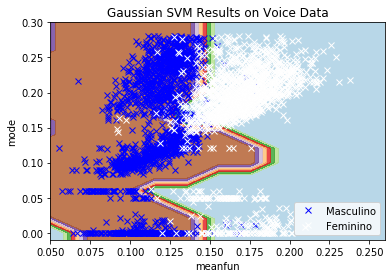

In [168]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'bx', label='Masculino')
plt.plot(class2_x, class2_y, 'wx', label='Feminino')
plt.title('Gaussian SVM Results on Voice Data')
plt.xlabel(dadis.columns[2])
plt.ylabel(dadis.columns[5])
plt.legend(loc='lower right')
plt.ylim([-0.01, 0.3])
plt.xlim([0.05, 0.26])
plt.show()

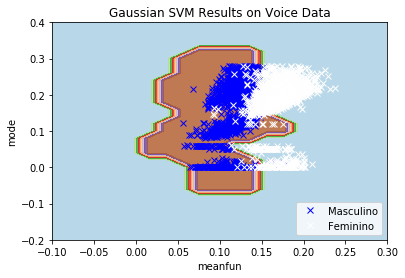

In [169]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'bx', label='Masculino')
plt.plot(class2_x, class2_y, 'wx', label='Feminino')
plt.title('Gaussian SVM Results on Voice Data')
plt.xlabel(dadis.columns[2])
plt.ylabel(dadis.columns[5])
plt.legend(loc='lower right')
plt.ylim([-0.2, 0.4])
plt.xlim([-0.1, 0.3])
plt.show()

Perda por geração no treinamento:

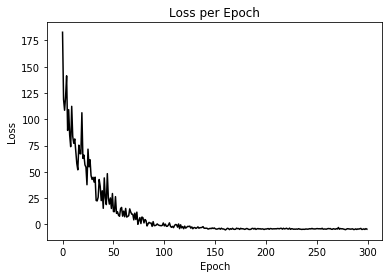

In [171]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()